In [142]:
#Project housing prices prediction
#library import
import pandas as pd
import numpy as np
from sklearn import cluster 
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from pandas.compat import StringIO
import seaborn as sns

#resetting window size
pd.util.terminal.get_terminal_size()
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 400)
os.getcwd()

'/Users/Wizard/Canopy/Kaggle/HousePrices'

In [143]:
#load file
df = pd.read_csv('train.csv')
df.head()
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [144]:
#descriptive analysis
print df.describe()
print df.shape
print df.dtypes
print df.isnull().sum()
#df.columns.values

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [145]:
#checking nulls
#null columns with sum count
for i in df.columns:
    if(df[i].isnull().sum()>0):
        print i, df[i].isnull().sum()

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [146]:
#removing nulls  from columns #MassvnrArea, electrical, FireplaceQu, Fence, PoolQC, MiscFeature, Alley

#1. remove electrical nan from df
df =  df[df.Electrical.notnull()]
#2 MasVNR, MasVnrArea, na impute with 0 and MasVnrType, add none with nas
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.MasVnrType = df.MasVnrType.fillna('None')
#3pool qc, mapping and na impute with 0
df.PoolQC = df.PoolQC.fillna('A')
#4.MiscFeature, dropping for now
#np.unique(df.MiscFeature)
#df[['MiscFeature','SalePrice']][df.MiscFeature.notnull()]
#df = df.drop(['MiscFeature'], axis = 1)
#5. Alley, imputing with NoAlley, dummy create
df.Alley.fillna('A', inplace = True)
##--- drop 'A' column after dummies
#6. Fence
df.Fence.fillna('A', inplace = True)
#7. FirePlace
df.FireplaceQu.fillna('A', inplace = True)
#8. ['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual']
df.GarageType.fillna('A',inplace = True)
#further imputations
df.GarageType = df.GarageType.replace({'BuiltIn':'Attchd', 'Basment':'Attchd','CarPort':'Attchd','2Types':'Attchd'})
#np.unique(df.GarageCond)
df.GarageCond.fillna('A', inplace = True)
#df.GarageCond = df.GarageCond.map({'A':0, 'Ex':5, 'Fa':2, 'Gd':4, 'Po':1, 'TA':3}).astype(int)
df.GarageFinish.fillna('A', inplace = True)
##--- create dummies - drop A
#9 BsmtQual
df.BsmtQual.fillna('A', inplace = True)
#df.BsmtQual = df.BsmtQual.map({'A':0, 'Ex':5, 'Fa':2, 'Gd':4, 'Po':1, 'TA':3}).astype(int)
#BsmtCond
df.BsmtCond.fillna('A', inplace = True)
#df.BsmtCond = df.BsmtCond.map({'A':0, 'Ex':5, 'Fa':2, 'Gd':4, 'Po':1, 'TA':3}).astype(int)
#BsmtExposure
df.BsmtExposure.fillna('A', inplace = True)
#df.BsmtExposure = df.BsmtExposure.map({'A':0, 'Mn':2, 'Gd':4, 'No':1, 'Av':3}).astype(int)
#BsmtFinType1
df.BsmtFinType1.fillna('A', inplace = True)
#df.BsmtFinType1= df.BsmtFinType1.map({'A':0, 'ALQ':5, 'BLQ': 4, 'GLQ':6, 'LwQ':2, 'Rec':3, 'Unf':1}).astype(int)
#BsmtFinType2
df.BsmtFinType2.fillna('A', inplace = True)
#df.BsmtFinType2 = df.BsmtFinType2.map({'A':0, 'ALQ':5, 'BLQ': 4, 'GLQ':6, 'LwQ':2, 'Rec':3, 'Unf':1}).astype(int)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,A,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,A,A,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,A,A,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,A,A,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,A,A,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,A,A,NaN,0,12,2008,WD,Normal,250000


In [147]:
#create new variables for builtyear, remodyear 
# create log of sales price
#drop old columns
#YearBuilt , remove = YearBuilt
df['yearbuilt'] = abs(df.YearBuilt -  df.YearBuilt.max())
#YearRemodAdd, remove = YearRemodAdd
df['yearremodadd'] = abs(df.YearRemodAdd -  df.YearRemodAdd.max())
#YrSold, remove = YrSold
df['yrsold'] = abs(df.YrSold -  df.YrSold.max())
#log of saleprice
df['LogSalePrice'] = np.log(df['SalePrice'])

In [148]:
#variable value counts check
df.columns
df.head()
for i in df:
    if i!='Id':
        print df[i].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
72.0      17
79.0      17
63.0      17
73.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0  

6     253
7     234
5     203
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
2009    338
2007    329
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64
WD       1266
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1197
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
115000    12
160000    12
139000    11
130000    11
185000    10
180000    10
143000    10
125000    10
144000    10
100000     9
127000     9
175000     9
147000     9
170000     8
129000     8
176000     8
250000     8
200000     8
230000     8
141000     8
165000     8
215000     8
235000     7
128000     7
178000     7
173000     7
120000     7
112000     7
148000     7
119000     7
181000     7


In [149]:
#further engineering, separate dummy variables, continous varuables
#disintegrate between ordinal/continous/dummy variables
#-----------------------
#continous = ['MSSubClass','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea', 'BsmtFinSF1',\
#'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',\
#'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','yearbuilt','yearremodadd','yrsold','LogSalePrice']
dummy =['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1',\
'Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',\
'MasVnrType','ExterQual','ExterCond',\
'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',\
'CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',\
'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars',\
'PavedDrive','Fence','MoSold','YrSold','SaleType','SaleCondition']

#drop = ['Street','Utilities','Condition2','RoofMatl','Heating','LowQualFinSF','PoolArea','PoolQC','MiscVal','']

In [ ]:
#outliers removal
df1 = df1[df1.LotArea<50000]
df1 = df1[df1.LotFrontage<150]

In [150]:
#get dummies for dummy1 and remove redundant variables
df1 = df1.drop(['Id','Utilities','LowQualFinSF','YearBuilt','YearRemodAdd',\
          'GarageYrBlt','GarageQual','GarageCond','PoolArea','PoolQC','MiscFeature','MiscVal','LogSalePrice'],axis=1)
#dummy variables
df1 = pd.get_dummies(df, columns = dummy) 
#dropping useless dummies
df1 = df1.drop(['Alley_A','BsmtQual_A','BsmtCond_A','BsmtExposure_A','BsmtFinType1_A','BsmtFinType2_A','FireplaceQu_A','GarageType_A',\
                'GarageFinish_A','Fence_A'], axis=1)

In [120]:
df1.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,yearbuilt,yearremodadd,yrsold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_0,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_0,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,HalfBath_2,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Ex,KitchenQual_Fa,KitchenQual

In [167]:
#filter features as per min variance
plt.figure(figsize=(10,8))
df_var = df1[df1.var()[df1.var()>0.001].index]
df_var.shape

(1187, 304)

In [168]:
#null check
for i in df_var.columns:
    if(df_var[i].isnull().sum()>0):
        print i, df_var[i].isnull().sum()

In [1]:
#prediction using least square regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
LR = LinearRegression()
y = df_var.SalePrice.values
X = df_var.drop(['SalePrice'],axis=1)

#Scaling minmax
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

# LR fit - least squares
LR.fit(X,y)
a = LR.score(X,y)

print "test score %s" %a
A  = pd.DataFrame(LR.predict(X))
plt.figure(figsize=(6,4))
sns.distplot(A, color= 'g', label = 'predicted')
sns.distplot(y, color = 'r', label = 'Real')
plt.legend()
plt.show()

NameError: name 'df_var' is not defined

In [202]:
#ridge and lasso
#ridge ---------------------------------
from sklearn.linear_model import Ridge
Ridg = Ridge(fit_intercept=True, max_iter=100,normalize=False, solver='auto', tol=0.1)
Ridg.fit(X,y)
print Ridg.score(X,y)
#lasso ---------------------------------
from sklearn.linear_model import LassoCV
Lasso = LassoCV(max_iter = 100, cv = 10, normalize = False)
Lasso.fit(X,y)
print Lasso.score(X,y)
#print pd.DataFrame(Lasso.predict(X))

0.938055594761
0.92060805986


In [220]:
#validity on train/test
#train test creation
mask = int(len(X)*0.8)
trainX = X[:mask,:]
trainy = y[:mask]
testX = X[mask:,:]
testy = y[mask:]
#y = df_var.SalePrice.values
#X = df_var.drop(['SalePrice'],axis=1)

In [258]:
#prediction on test
mm = MinMaxScaler()
trainX = mm.fit_transform(trainX)
# LR fit - least squares
LR.fit(trainX,trainy)
a = LR.score(trainX,trainy)
print "test score %s" %a
A  = LR.predict(testX)
B  = LR.predict(trainX)

test score 0.946856230465


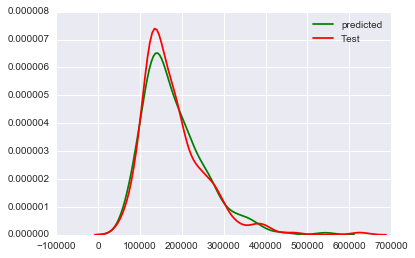

In [255]:
#kde plots for prediction vs test
sns.kdeplot(A, color = 'g', label = 'predicted')
sns.kdeplot(testy, color = 'r', label = 'Test')

In [265]:
#validation metrics 
from sklearn.metrics import mean_squared_error
print 'train rmse = %s' %mean_squared_error(trainy, B)
print 'test rmse  = %s' %mean_squared_error(testy, A)
#print pd.Series(testy)
#print pd.Series(A)
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
print 'train r2 = %s' %r2_score(trainy, B)
print 'test r2  = %s' %r2_score(testy, A)

print 'train var = %s' %explained_variance_score(trainy, B)
print 'test var  = %s' %explained_variance_score(testy, A)

print 'train mae = %s' %mean_absolute_error(trainy, B)
print 'test mae = %s' %mean_absolute_error(testy, A)

print 'train medad = %s' %median_absolute_error(trainy, B)
print 'test medad = %s' %median_absolute_error(testy, A)

train rmse = 356818856.16
test rmse  = 799437421.097
train r2 = 0.946856230465
test r2  = 0.858680131149


train var = 0.946856230465
test var  = 0.859912230746
train mae = 12182.8826492
test mae = 19058.5327266
train medad = 8510.27571997
test medad = 14145.9541722


In [ ]:
#further steps#
#model using feature reduction techniques
#variable reduction and run model again
#Cross validation
#other Ml check
#final prediction on test data
#check for errors
#run model again